### Limma voom analysis of Age Dataset: RNA-seq


In [1]:
rm(list=ls())
#load necessary libraries 
library(ggplot2)
library("BiocParallel")
parallelFlag=TRUE
register(MulticoreParam(50))
library(sva)
library(limma)
library(statmod)

Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Loading required package: genefilter


## Load data and design

In [2]:
##load RNA-seq TPM
data=read.table('../good_reps_counts_batches//age.rna.counts.goodreps.txt.tpm',header=TRUE,sep='\t')
rownames(data)=paste(data$GeneID,data$GeneName,sep="_")
data$GeneID=NULL
data$GeneName=NULL

In [3]:


data=data[rowSums(data)>0,]

head(data)

,d0_A_Rep1,d0_A_Rep2,d0_A_Rep4,d0_Y_Rep2,d0_Y_Rep3,d0_Y_Rep4,d0_Y_Rep5,d0_Y_Rep6,d0_Y_Pax7_Rep1,d1_A_Rep1,⋯,d5_A_Rep2,d5_Y_Rep1,d5_Y_Rep2,d5_Y_Rep3,d7_A_Rep1,d7_A_Rep2,d7_A_Rep4,d7_Y_Rep1,d7_Y_Rep2,d7_Y_Rep3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000000001_Gnai3,33.66,32.74,103.55,157.71,63.06,102.83,231.55,174.64,162.42,149.95,⋯,150.23,160.62,159.77,121.53,183.29,175.34,164.38,120.19,132.60,175.81
ENSMUSG00000000028_Cdc45,1.90,2.33,8.25,7.65,6.26,5.88,32.78,3.08,5.82,47.59,⋯,6.15,27.66,26.31,28.41,22.41,23.37,14.82,31.30,12.53,36.95
ENSMUSG00000000031_H19,1.72,2.05,5.61,0.66,4.91,2.56,1.71,0.00,35.36,4.21,⋯,3.41,87.43,75.14,161.20,58.76,66.95,35.30,71.70,34.19,25.50
ENSMUSG00000000037_Scml2,0.39,0.20,1.77,1.02,0.50,0.53,2.38,2.13,1.54,1.99,⋯,0.21,2.63,2.56,2.72,2.86,2.26,4.08,1.39,1.37,3.17
ENSMUSG00000000049_Apoh,1.22,1.11,0.35,0.00,0.12,0.26,0.00,0.45,0.00,0.04,⋯,0.00,0.00,0.04,0.00,0.00,0.00,0.49,0.10,0.00,0.00
ENSMUSG00000000056_Narf,3.18,2.53,11.92,10.01,10.31,8.45,6.60,11.47,10.70,4.04,⋯,11.03,10.45,9.64,11.29,14.16,12.11,8.11,5.36,14.06,10.36


In [4]:
nrow(data)

[1] 36472

In [5]:
#load the metadata
batches=read.table("../good_reps_counts_batches/batches.goodreps.txt",header=TRUE,sep='\t')
batches$Batch=factor(batches$Batch)
batches$Pax7=factor(batches$Pax7)
batches$Age=factor(batches$Age)
batches$File=NULL
batches

Day,Age,Pax7,Batch,Rep
<int>,<fct>,<fct>,<fct>,<fct>
0,A,0,R2200,d0_A_Rep1
0,A,0,R2081,d0_A_Rep2
0,A,0,R2830,d0_A_Rep4
0,Y,1,R2879,d0_Y_Pax7_Rep1
0,Y,0,R2081,d0_Y_Rep2
0,Y,0,R2081,d0_Y_Rep3
0,Y,0,R2081,d0_Y_Rep4
0,Y,0,R2879,d0_Y_Rep5
0,Y,0,R2879,d0_Y_Rep6


In [6]:
#use asinh(tpm)
E=as.matrix(asinh(data))

## Correlation 

In [7]:
spearman_cor=cor(E, method = "spearman")

In [8]:
pearson_cor=cor(E,method="pearson")

In [9]:
write.table(spearman_cor,file="rna.uncorrected.spearman_r.tsv",quote=FALSE)
write.table(pearson_cor,file="rna.uncorrected.pearson_r.tsv",quote=FALSE)

In [10]:
## plot correlation heatmaps 
library(gplots)
require(gtools)
require(RColorBrewer)
cols <- colorRampPalette(brewer.pal(10, "RdBu"))(256)

svg(filename="RNA_rep_spearman_cor_preSVA.svg",
   height=8,
   width=8,
   pointsize=12)
cur_h=heatmap.2(as.matrix(spearman_cor), 
          trace="none", 
          scale="none", 
          Rowv=TRUE,
          Colv=TRUE,
          col=rev(cols), 
          dendrogram="none",
          margins=c(10,10),
          main="RNA-seq replicates spearman correlation -- pre-SVA")
dev.off() 



Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: gtools

Attaching package: ‘gtools’

The following object is masked from ‘package:mgcv’:

    scat

Loading required package: RColorBrewer


png 
  2

In [11]:
dev.off() 

null device 
          1

In [12]:
svg(filename="RNA_rep_pearson_cor_preSVA.svg",
   height=8,
   width=8,
   pointsize=12)
cur_h=heatmap.2(as.matrix(pearson_cor), 
          trace="none", 
          scale="none", 
          Rowv=TRUE,
          Colv=TRUE,
          col=rev(cols), 
          dendrogram="none",
          margins=c(10,10),          
          main="RNA-seq replicates pearson correlation -- pre-SVA")

dev.off() 

png 
  2

## Run PCA 

In [13]:
data.pca=prcomp(t(E))

In [14]:
var_explained=as.character(round(100*data.pca$sdev^2/sum(data.pca$sdev^2),2))

In [15]:
svg(filename="age_rna_uncorrected_scree.svg",
   height=3,
   width=4,
   pointsize=12)
print(barplot(100*data.pca$sdev^2/sum(data.pca$sdev^2),las=2,ylab="% Variance Explained",xlab="Principal Component",ylim=c(0,40), xlim=c(0,10)))
dev.off() 

      [,1]
 [1,]  0.7
 [2,]  1.9
 [3,]  3.1
 [4,]  4.3
 [5,]  5.5
 [6,]  6.7
 [7,]  7.9
 [8,]  9.1
 [9,] 10.3
[10,] 11.5
[11,] 12.7
[12,] 13.9
[13,] 15.1
[14,] 16.3
[15,] 17.5
[16,] 18.7
[17,] 19.9
[18,] 21.1
[19,] 22.3
[20,] 23.5
[21,] 24.7
[22,] 25.9
[23,] 27.1
[24,] 28.3
[25,] 29.5
[26,] 30.7
[27,] 31.9
[28,] 33.1
[29,] 34.3
[30,] 35.5
[31,] 36.7
[32,] 37.9


png 
  2

In [16]:
pca_df=data.frame(data.pca$x)
pca_df=cbind(pca_df,batches)
pca_df$Day=factor(pca_df$Day)

In [17]:
svg(filename="age_rna_uncorrected_PC1_vs_PC2_batch.svg",
   height=8,
   width=8,
   pointsize=12)
print(ggplot(data=pca_df,aes(x=pca_df$PC1,y=pca_df$PC2,color=pca_df$Day,shape=pca_df$Age,label=pca_df$Rep))+
geom_point(size=5)+
geom_text(nudge_x=2,nudge_y = 12,size=2)+
scale_color_manual(values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#000000'))+
theme_bw() )
dev.off() 

png 
  2

In [18]:
svg(filename="age_rna_uncorrected_PC2_vs_PC3_batch.svg",
   height=8,
   width=8,
   pointsize=12)
print(ggplot(data=pca_df,aes(x=pca_df$PC2,y=pca_df$PC3,color=pca_df$Day,shape=pca_df$Age,label=pca_df$Rep))+
geom_point(size=5)+
geom_text(nudge_x=2,nudge_y = 12,size=2)+
scale_color_manual(values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#000000'))+
theme_bw())
dev.off() 

png 
  2

In [19]:
svg(filename="age_rna_uncorrected_PC1_vs_PC3_batch.svg",
   height=8,
   width=8,
   pointsize=12)
print(ggplot(data=pca_df,aes(x=pca_df$PC1,y=pca_df$PC3,color=pca_df$Day,shape=pca_df$Age,label=pca_df$Rep))+
geom_point(size=5)+
geom_text(nudge_x=2,nudge_y = 12,size=2)+
scale_color_manual(values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#000000'))+
theme_bw())
dev.off() 

png 
  2

## Running SVA correction 

In [20]:
head(batches)

Day,Age,Pax7,Batch,Rep
<int>,<fct>,<fct>,<fct>,<fct>
0,A,0,R2200,d0_A_Rep1
0,A,0,R2081,d0_A_Rep2
0,A,0,R2830,d0_A_Rep4
0,Y,1,R2879,d0_Y_Pax7_Rep1
0,Y,0,R2081,d0_Y_Rep2
0,Y,0,R2081,d0_Y_Rep3


In [21]:
Grouping <- factor(paste0(batches$Day,".",batches$Age, ".", batches$Pax7))
batches$Grouping=Grouping

In [22]:
mod0=model.matrix(~1,data=batches)
#mod1=model.matrix(~Day+Age+Pax7+Batch,data=batches)
mod1=model.matrix(~0+Grouping+Batch,data=batches)

In [23]:
sva.obj=sva(E,mod1,mod0)

Number of significant surrogate variables is:  4 
Iteration (out of 5 ):1  2  3  4  5  

In [24]:
sur_var=data.frame(sva.obj$sv)

In [25]:
full.design.sv=cbind(mod1,sur_var)


In [26]:
#save the full design so we don't have to run SVA next time 
write.table(full.design.sv,file="full.design.sv.txt",quote=FALSE,sep='\t')


In [27]:
#full.design.sv=read.table("full.design.sv.txt",header=TRUE,sep='\t')


### Perform pca on the "cleaned" matrix with surrogate variable contributions removed


In [28]:
nrow(batches)

[1] 32

In [29]:
cleaned_E=removeBatchEffect(E,batch=batches$Batch,covariates=sur_var,design=model.matrix(~0+Grouping,data=batches))


In [30]:
write.table(cleaned_E,file="RNA_asinh_tpm_minus_sva_contribs.txt",quote=FALSE,sep='\t')

In [31]:
write.table(sinh(cleaned_E),file="RNA_transformed_tpm_minus_sva_contribs.txt",quote=FALSE,sep='\t')

In [32]:
## Run replicate correlation on SVA corrected dataset 
spearman_cor=cor(cleaned_E, method = "spearman")
pearson_cor=cor(cleaned_E,method="pearson")

In [33]:
write.table(spearman_cor,file="rna.corrected.spearman_r.tsv",quote=FALSE)
write.table(pearson_cor,file="rna.corrected.pearson_r.tsv",quote=FALSE)

In [34]:

svg(filename="RNA_rep_spearman_cor_postSVA.svg",
   height=8,
   width=8,
   pointsize=12)
cur_h=heatmap.2(as.matrix(spearman_cor), 
          trace="none", 
          scale="none", 
          Rowv=TRUE,
          Colv=TRUE,
          col=rev(cols), 
          dendrogram="none",
          margins=c(12,12),          
          main="RNA-seq replicates spearman correlation -- post-SVA ")
dev.off() 



png 
  2

In [35]:
svg(filename="RNA_rep_pearson_cor_postSVA.svg",
   height=8,
   width=8,
   pointsize=12)

cur_h=heatmap.2(as.matrix(pearson_cor), 
          trace="none", 
          scale="none", 
          Rowv=TRUE,
          Colv=TRUE,
          col=rev(cols), 
          dendrogram="none",
          margins=c(12,12),          
          main="RNA-seq replicates pearson correlation -- post SVA")
dev.off() 


png 
  2

In [36]:
data.pca=prcomp(t(cleaned_E))

In [37]:
var_explained=as.character(round(100*data.pca$sdev^2/sum(data.pca$sdev^2),2))


In [38]:
svg(filename="age_rna_corrected_scree.svg",
   height=3,
   width=4,
   pointsize=12)
print(barplot(100*data.pca$sdev^2/sum(data.pca$sdev^2),las=2,ylab="% Variance Explained",xlab="Principal Component",ylim=c(0,40), xlim=c(0,10)))
dev.off()

      [,1]
 [1,]  0.7
 [2,]  1.9
 [3,]  3.1
 [4,]  4.3
 [5,]  5.5
 [6,]  6.7
 [7,]  7.9
 [8,]  9.1
 [9,] 10.3
[10,] 11.5
[11,] 12.7
[12,] 13.9
[13,] 15.1
[14,] 16.3
[15,] 17.5
[16,] 18.7
[17,] 19.9
[18,] 21.1
[19,] 22.3
[20,] 23.5
[21,] 24.7
[22,] 25.9
[23,] 27.1
[24,] 28.3
[25,] 29.5
[26,] 30.7
[27,] 31.9
[28,] 33.1
[29,] 34.3
[30,] 35.5
[31,] 36.7
[32,] 37.9


png 
  2

In [39]:
var_explained[0:10]


[1] "35.87" "14.8"  "9.71"  "9.48"  "7"     "4.74"  "3.3"   "2.77"  "2.46" 
[10] "1.48"

In [40]:
pca_df=data.frame(data.pca$x)
pca_df=cbind(pca_df,batches)
pca_df$Day=factor(pca_df$Day)

In [41]:
svg(filename="age_rna_corrected_PC1_vs_PC2.svg",
   height=8,
   width=8,
   pointsize=12)
print(ggplot(data=pca_df,aes(x=pca_df$PC1,y=pca_df$PC2,color=pca_df$Day,shape=pca_df$Age,label=pca_df$Rep))+
geom_point(size=5)+
geom_text(nudge_x=2,nudge_y = 12,size=2)+
scale_color_manual(values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00'))+
theme_bw())
dev.off()

png 
  2

In [42]:
svg(filename="age_rna_corrected_PC2_vs_PC3.svg",
   height=8,
   width=8,
   pointsize=12)
print(ggplot(data=pca_df,aes(x=pca_df$PC2,y=pca_df$PC3,color=pca_df$Day,shape=pca_df$Age,label=pca_df$Rep))+
geom_point(size=5)+
geom_text(nudge_x=2,nudge_y = 12,size=2)+
scale_color_manual(values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00'))+
theme_bw())
dev.off()

png 
  2

In [43]:
svg(filename="age_rna_corrected_PC1_vs_PC3.svg",
   height=8,
   width=8,
   pointsize=12)
print(ggplot(data=pca_df,aes(x=pca_df$PC1,y=pca_df$PC3,color=pca_df$Day,shape=pca_df$Age,label=pca_df$Rep))+
geom_point(size=5)+
geom_text(nudge_x=2,nudge_y = 12,size=2)+
scale_color_manual(values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00'))+
theme_bw())
dev.off()

png 
  2

### fit model with limma 

In [44]:
#fit <- lmFit(E,full.design.sv)
fit = lmFit(cleaned_E,model.matrix(~0+Grouping))

In [45]:
colnames(fit)


[1] "Grouping0.A.0" "Grouping0.Y.0" "Grouping0.Y.1" "Grouping1.A.0"
 [5] "Grouping1.Y.0" "Grouping3.A.0" "Grouping3.Y.0" "Grouping5.A.0"
 [9] "Grouping5.Y.0" "Grouping7.A.0" "Grouping7.Y.0"

In [46]:
colnames(fit$coefficients)

[1] "Grouping0.A.0" "Grouping0.Y.0" "Grouping0.Y.1" "Grouping1.A.0"
 [5] "Grouping1.Y.0" "Grouping3.A.0" "Grouping3.Y.0" "Grouping5.A.0"
 [9] "Grouping5.Y.0" "Grouping7.A.0" "Grouping7.Y.0"

###  Contrasts 

In [47]:
#create contrasts of interest 
cont.matrix=makeContrasts(
    d0_Y_vs_A="Grouping0.Y.0 - Grouping0.A.0",  
    d1_Y_vs_A="Grouping1.Y.0 - Grouping1.A.0",
    d3_Y_vs_A="Grouping3.Y.0 - Grouping3.A.0",
    d5_Y_vs_A="Grouping5.Y.0 - Grouping5.A.0",
    d7_Y_vs_A="Grouping7.Y.0 - Grouping7.A.0",
    d1_Y_vs_d0_Y="Grouping1.Y.0 - Grouping0.Y.0",
    d1_A_vs_d0_A="Grouping1.A.0 - Grouping0.A.0",
    d3_Y_vs_d1_Y="Grouping3.Y.0 - Grouping1.Y.0",
    d3_A_vs_d1_A="Grouping3.A.0 - Grouping1.A.0",
    d5_Y_vs_d3_Y="Grouping5.Y.0 - Grouping3.Y.0",
    d5_A_vs_d3_A="Grouping5.A.0 - Grouping3.A.0",
    d7_Y_vs_d5_Y="Grouping7.Y.0 - Grouping5.Y.0",
    d7_A_vs_d5_A="Grouping7.A.0 - Grouping5.A.0",
    d0_Y_Pax_7_vs_d0_Y_noPax7="Grouping0.Y.1 - Grouping0.Y.0",
    levels=model.matrix(~0+Grouping))


In [48]:
pval_thresh=0.01
lfc_thresh=1

In [49]:
fit2=contrasts.fit(fit,cont.matrix)
e=eBayes(fit2)
comparisons=colnames(cont.matrix)

Warning message:
“Zero sample variances detected, have been offset away from zero”

In [50]:
for(i in seq(1,length(comparisons)))
{
  tab<-topTable(e, number=nrow(e),coef=i,lfc=lfc_thresh, p.value = pval_thresh)
  up=sum(tab$logFC>0)
  down=sum(tab$logFC<0)
  sig=nrow(tab)
  curtitle=paste(comparisons[i],'\n','sig:',sig,'\n','up:',up,'\n','down:',down,'\n')
  print(curtitle)
  vals=topTable(e,number=nrow(e),coef=i)
  vals$pscaled=-1*log10(vals$adj.P.Val)
  vals$sig=vals$adj.P.Val<pval_thresh & abs(vals$logFC)>lfc_thresh 
  png(paste("volcano_diff",comparisons[i],".png",sep=""))
  print(ggplot(data=vals,
               aes(y=vals$pscaled,x=vals$logFC,color=vals$sig))+
               geom_point(alpha=0.1)+
               xlab("log2(FC)")+
               ylab("-log10(pval)")+
               ggtitle(curtitle)+
               theme_bw()+
               scale_color_manual(values=c("#000000","#FF0000")))
  dev.off() 
  write.table(tab,file=paste("diff_",comparisons[i],".tsv",sep=""),quote=FALSE,sep='\t',row.names = TRUE,col.names = TRUE)
}
    

[1] "d0_Y_vs_A \n sig: 629 \n up: 368 \n down: 261 \n"
[1] "d1_Y_vs_A \n sig: 1742 \n up: 741 \n down: 1001 \n"
[1] "d3_Y_vs_A \n sig: 245 \n up: 91 \n down: 154 \n"
[1] "d5_Y_vs_A \n sig: 4242 \n up: 2181 \n down: 2061 \n"
[1] "d7_Y_vs_A \n sig: 1140 \n up: 886 \n down: 254 \n"
[1] "d1_Y_vs_d0_Y \n sig: 1377 \n up: 887 \n down: 490 \n"
[1] "d1_A_vs_d0_A \n sig: 2360 \n up: 1791 \n down: 569 \n"
[1] "d3_Y_vs_d1_Y \n sig: 4192 \n up: 1693 \n down: 2499 \n"
[1] "d3_A_vs_d1_A \n sig: 1909 \n up: 600 \n down: 1309 \n"
[1] "d5_Y_vs_d3_Y \n sig: 1051 \n up: 683 \n down: 368 \n"
[1] "d5_A_vs_d3_A \n sig: 4720 \n up: 2185 \n down: 2535 \n"
[1] "d7_Y_vs_d5_Y \n sig: 1247 \n up: 842 \n down: 405 \n"
[1] "d7_A_vs_d5_A \n sig: 4304 \n up: 2038 \n down: 2266 \n"
[1] "d0_Y_Pax_7_vs_d0_Y_noPax7 \n sig: 4140 \n up: 2127 \n down: 2013 \n"


In [51]:
cleaned_E_df=as.data.frame(cleaned_E)
head(cleaned_E_df)

,d0_A_Rep1,d0_A_Rep2,d0_A_Rep4,d0_Y_Rep2,d0_Y_Rep3,d0_Y_Rep4,d0_Y_Rep5,d0_Y_Rep6,d0_Y_Pax7_Rep1,d1_A_Rep1,⋯,d5_A_Rep2,d5_Y_Rep1,d5_Y_Rep2,d5_Y_Rep3,d7_A_Rep1,d7_A_Rep2,d7_A_Rep4,d7_Y_Rep1,d7_Y_Rep2,d7_Y_Rep3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000000001_Gnai3,4.7411940,5.0992198,4.9847304,5.5846046,5.30712491,5.8207697,5.5692902,5.5915321,5.5449591,5.6601784,⋯,5.72863337,5.85222072,5.76040498,5.7769776,5.5631203,5.5455669,5.5051168,5.53144555,5.4168451,5.46961408
ENSMUSG00000000028_Cdc45,2.2231559,2.2380906,2.6525521,2.5963056,2.49625471,2.4910488,2.4074022,2.2981404,2.4045276,4.5344667,⋯,2.50047695,4.03151952,4.00420157,3.8356339,3.6024376,3.6628883,3.5331566,4.44384732,3.0943943,3.97354298
ENSMUSG00000000031_H19,1.8809843,1.4433668,1.9983681,1.7671132,1.95114753,1.2389882,1.5224430,1.4062306,1.5596154,2.0632514,⋯,2.07250410,5.15710132,5.03276900,5.0496869,3.9809039,3.9887460,4.0254166,4.91416153,3.8799127,4.55532295
ENSMUSG00000000037_Scml2,0.8295725,0.8530665,0.8610695,0.4548544,0.85642479,0.9029679,0.8673222,0.9061906,0.8703086,1.6525654,⋯,0.45414049,1.88606305,1.89204160,1.9749363,1.7800089,1.6186176,1.6567513,1.36634097,1.2490518,1.28487598
ENSMUSG00000000049_Apoh,0.5403837,0.4525328,0.3877751,-0.1119516,0.07830937,0.1952664,0.1635276,0.1874306,0.1317140,0.3153574,⋯,0.03110389,0.02988406,0.08356946,0.1166229,0.3420104,0.5615951,0.4068583,0.02356256,0.2027261,0.08817612
ENSMUSG00000000056_Narf,2.7750182,2.8872924,2.8125416,2.9444830,3.18113730,3.0427042,3.1476161,3.2168433,3.1533610,1.9664420,⋯,2.97580758,2.79902629,2.80557594,2.9523649,2.5619505,2.4085832,2.5952235,2.51826968,2.8448192,2.57123516


## Plot d0_Y vs d0_Y_Pax7

In [63]:
d0_Y=sinh((cleaned_E_df$d0_Y_Rep2+
    cleaned_E_df$d0_Y_Rep3+
    cleaned_E_df$d0_Y_Rep4+
    cleaned_E_df$d0_Y_Rep5+
    cleaned_E_df$d0_Y_Rep6)/5)
d0_Y_Pax7=sinh((cleaned_E_df$d0_Y_Pax7_Rep1))

In [64]:
d0_Y_df=data.frame(rownames(cleaned_E_df),d0_Y,d0_Y_Pax7)

In [65]:
head(d0_Y_df)

rownames.cleaned_E_df.,d0_Y,d0_Y_Pax7
<fct>,<dbl>,<dbl>
ENSMUSG00000000001_Gnai3,131.8286182,127.9701062
ENSMUSG00000000028_Cdc45,5.7969115,5.4914449
ENSMUSG00000000031_H19,2.3173751,2.2733872
ENSMUSG00000000037_Scml2,0.8848345,0.9844127
ENSMUSG00000000049_Apoh,0.1026961,0.1320952
ENSMUSG00000000056_Narf,11.1496107,11.6859604


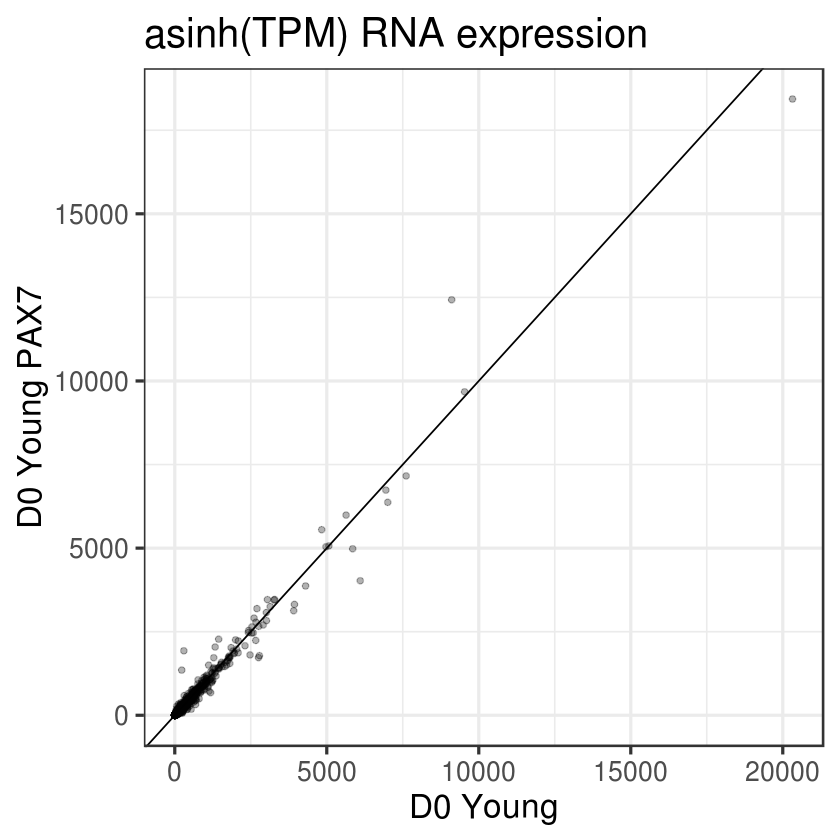

In [68]:
#svg(filename="RNA_d0Y_vs_d0YPax7.svg",
#   height=8,
#   width=8,
#   pointsize=12)
print(ggplot(data=d0_Y_df,
      aes(x=d0_Y_df$d0_Y,
         y=d0_Y_df$d0_Y_Pax7))+
geom_point(alpha=0.3)+
geom_abline(slope=1)+
xlab("D0 Young")+
ylab("D0 Young PAX7")+
ggtitle("asinh(TPM) RNA expression")+

theme_bw(20))
#dev.off()

In [69]:
d0_Y_df$delta=d0_Y_df$d0_Y_Pax7/d0_Y_df$d0_Y

In [70]:
d0_Y_df=d0_Y_df[order(d0_Y_df$delta),]

In [71]:
head(d0_Y_df)

,rownames.cleaned_E_df.,d0_Y,d0_Y_Pax7,delta
,<fct>,<dbl>,<dbl>,<dbl>
23678,ENSMUSG00000086273_Rbm46os,-4.654638e-06,0.006633936,-1425.2311
28066,ENSMUSG00000097267_1700109K24Rik,-5.365455e-04,0.232200371,-432.7692
29483,ENSMUSG00000100037_Gm29103,-6.409248e-05,0.019604339,-305.8758
33167,ENSMUSG00000106658_Gm42426,9.824527e-05,-0.028757466,-292.7109
20715,ENSMUSG00000081159_Gm6023,-4.051214e-05,0.009669236,-238.6750
35191,ENSMUSG00000109808_5430402P08Rik,-1.448591e-04,0.031175436,-215.2122


In [72]:
tail(d0_Y_df)

,rownames.cleaned_E_df.,d0_Y,d0_Y_Pax7,delta
,<fct>,<dbl>,<dbl>,<dbl>
16234,ENSMUSG00000059483_Gm5528,1.249351e-04,0.03174183,254.0666
17809,ENSMUSG00000067599_Klra7,-8.663463e-05,-0.02504999,289.1453
33125,ENSMUSG00000106588_Gm17590,5.431101e-04,0.16313645,300.3746
1061,ENSMUSG00000006948_Klk4,-4.593306e-05,-0.01384189,301.3492
13759,ENSMUSG00000047841_BC051628,-2.839563e-05,-0.01458421,513.6074
17755,ENSMUSG00000067220_Cnga1,-3.622241e-05,-0.02797951,772.4364


## Ddit3

In [73]:
ddit3_subset=sinh(cleaned_E_df[rownames(cleaned_E_df)=="ENSMUSG00000025408_Ddit3",])

In [74]:
write.table(ddit3_subset,file="DDIT3_tpm_svacorrected.txt")